Projekt #5 (Titanic)

In [0]:
#importuje potrzebne biblioteki
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt

In [2]:
#importuje plik csv

titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print("Number of Rows = " + str(len(titanic)))
print()
print("Number of Rows with missing values by column:")
pd.isnull(titanic).sum()

Number of Rows = 891

Number of Rows with missing values by column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Procent ocalałych ze względu na klase')

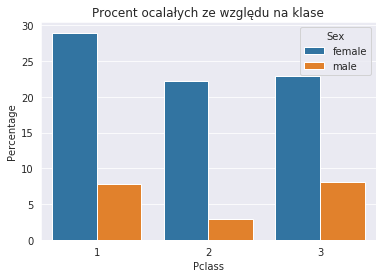

In [3]:
#tworzę histogram ocalałych ze względu na wiek i i klasę w jakiej podróżowali      
  
num_males = len(titanic.loc[titanic["Sex"]=="male",])
num_females = len(titanic.loc[titanic["Sex"]=="female",])

rates = titanic.loc[titanic["Survived"]==1, ["Pclass","Sex","PassengerId"]]
rates = pd.DataFrame(rates.groupby(["Pclass","Sex"]).count())
rates.reset_index(inplace=True)  
rates["Percentage"]=0

for row in range(len(rates)):
    if rates.loc[row,"Sex"]=="male":
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_males)*100,2)
    else:
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_females)*100,2)

sns.set_style("darkgrid")
sns.barplot(x="Pclass", y="Percentage", hue="Sex", data=rates).set_title("Procent ocalałych ze względu na klase")


Text(0.5, 1.0, 'Procent ofiar ze względu na klase')

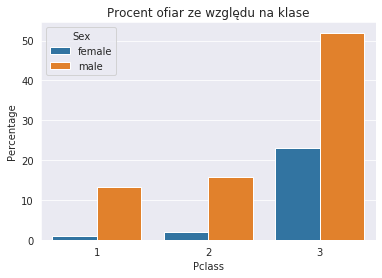

In [4]:
#tworzę histogram ofiar ze względu na wiek i i klasę w jakiej podróżowali


num_males = len(titanic.loc[titanic["Sex"]=="male",])
num_females = len(titanic.loc[titanic["Sex"]=="female",])

rates = titanic.loc[titanic["Survived"]==0, ["Pclass","Sex","PassengerId"]]
rates = pd.DataFrame(rates.groupby(["Pclass","Sex"]).count())
rates.reset_index(inplace=True)  
rates["Percentage"]=0 


for row in range(len(rates)):
    if rates.loc[row,"Sex"]=="male":
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_males)*100,2)
    else:
        rates.loc[row, "Percentage"] = round((rates.loc[row,"PassengerId"]/num_females)*100,2)

sns.set_style("darkgrid")
sns.barplot(x="Pclass", y="Percentage", hue="Sex", data=rates).set_title("Procent ofiar ze względu na klase")


Text(0.5, 1.0, 'Dystrybucja ze względu na klasę')

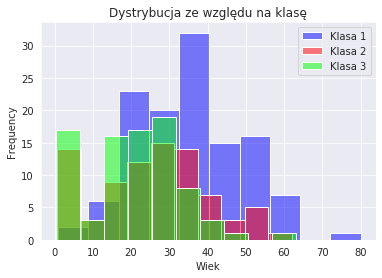

In [5]:
#sprawdzam liczbę ocalałych ze względu na klasę w jakiej podróżowali

ocaleni_1 = titanic.loc[(titanic["Survived"]==1)&(titanic["Pclass"]==1), "Age"]
ocaleni_2 = titanic.loc[(titanic["Survived"]==1)&(titanic["Pclass"]==2), "Age"]
ocaleni_3 = titanic.loc[(titanic["Survived"]==1)&(titanic["Pclass"]==3), "Age"]

ocaleni_1.plot.hist(fc=(0, 0, 1, 0.5), label="Klasa 1")
ocaleni_2.plot.hist(fc=(1, 0, 0, 0.5), label="Klasa 2")
ocaleni_3.plot.hist(fc=(0, 1, 0, 0.5), label="Klasa 3")
plt.xlabel("Wiek")
plt.legend(loc='upper right')
plt.title("Dystrybucja ze względu na klasę")

Text(0.5, 1.0, 'Dystrybucja ze względu na klasę')

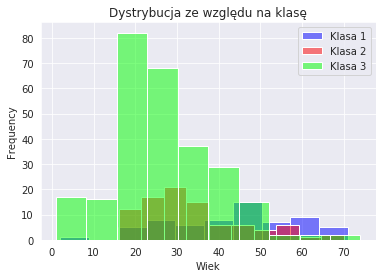

In [6]:
#sprawdzam liczbę ofiar ze względu na klasę w jakiej podróżowali


ofiary_1 = titanic.loc[(titanic["Survived"]==0)&(titanic["Pclass"]==1), "Age"]
ofiary_2 = titanic.loc[(titanic["Survived"]==0)&(titanic["Pclass"]==2), "Age"]
ofiary_3 = titanic.loc[(titanic["Survived"]==0)&(titanic["Pclass"]==3), "Age"]

ofiary_1.plot.hist(fc=(0, 0, 1, 0.5), label="Klasa 1")
ofiary_2.plot.hist(fc=(1, 0, 0, 0.5), label="Klasa 2")
ofiary_3.plot.hist(fc=(0, 1, 0, 0.5), label="Klasa 3")
plt.xlabel("Wiek")
plt.legend(loc='upper right')
plt.title("Dystrybucja ze względu na klasę")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0.5, 1.0, 'Dystrybucja wieku ofiar oraz ocalałych')

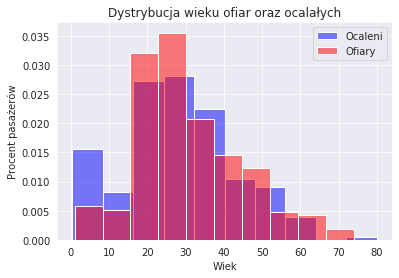

In [7]:
#tworzę histogram porównawczy wieku z podziałem na ocalałych oraz ofiary

age_survived = titanic.loc[titanic['Survived']==1, "Age"]
age_survived.plot.hist(fc=(0, 0, 1, 0.5), normed=1, label="Ocaleni")
age_did_not_survive = titanic.loc[titanic['Survived']==0, "Age"]
age_did_not_survive.plot.hist(fc=(1, 0, 0, 0.5), normed=1, label="Ofiary")
plt.xlabel("Wiek")
plt.ylabel("Procent pasażerów")
plt.legend(loc='upper right')
plt.title("Dystrybucja wieku ofiar oraz ocalałych")